<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# **Data Spaces - Analysis of the Online Shoppers Purchasing Intention Dataset**

**Martina Alutto, s265027**

**Introduction**

The analysis that will be presented has been carried out on the dataset available online at the following link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset.

This dataset consists of feature vectors belonging to 12,330 online sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user
profile, or period. Some of these sessions on the site end with a purchase, while others do not.
The dataset contains 18 features, where 10 are numerical and 8 are categorical attributes, there is also the 'Revenue' attribute, that indicates whether the session ends with shopping or not and this could be used as the class label.

The columns containing users’s attributes are described in the following:


*  "Administrative", "Administrative_Duration", "Informational", "Informational _Duration", "ProductRelated" and "ProductRelated_Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
*  "BounceRates" for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
*  "ExitRates" for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
*  "PageValues" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The previous three features represent the metrics measured by *Google Analytics* for each page in the e-commerce site. 
*   "SpecialDay" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
*   "Month" indicates the month in which the session took place.
*   "OperatingSystems" and "Browser" are features indicating which operating system and browser are used by categorical values.
*   "Region" indicates the geographic region of the user. 
*   "TrafficType" is a particular identifier type for any hierarchy of customer base: *user* or *account* are two of the most commonly defined traffic types. (In the dataset this is a categorical feature).
*   "VisitorType" states the nature of the user as returning or new visitor.
*   "Weekend" features indicates whether the session's date is weekend or not.

As mentioned earlier, the boolean attribute "Revenue" is used to understand if the session in question ends with a purchase (and was therefore successful) or if instead it was limited to a search or a quick look at the products. The analysis of the users' behaviour could be very useful to predict it and to provide a better organisation of the site (e.g. a restyiling with more pop-ups that encourage purchase by users or more offers) in order to avoid leaving the site without shopping.

The analysis carried out consists of a supervised classification problem, using the Python language and Jupyter Notebook. 

Among the main packages imported for the purposes of our analysis are to be reported: 
-  *pandas*: an open-source library prviding high-performance data structures and data analysis tools for manipulating numerical tables and time series.
-  *numpy*: the fundamental package for scientific computing with Python.
NumPy provides among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra and random number capabilities.
-  *sklearn*: a free machine learning library providing tools for data mining.It features various algorithms like support vector machine, random forests, and k-neighbours.
-  *matplotlib*: a comprehensive library for creating static, animated, and interactive visualizations.
-  *seaborn*: a Python data visualization library based on *matplotlib*, providing an interface for statistical graphics.

In [1]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [6]:
# TESINA DATA SPACES

# Import libraries
import csv

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn
from sklearn import decomposition, preprocessing
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from IPython.display import Image  
#import pydotplus

import plotly
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# online plotly
import chart_studio
from chart_studio.plotly import plot, iplot
chart_studio.tools.set_credentials_file(username='XXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXX')

# offline plotly
#from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# set the seed for the analysis
SEED = 40

# pandas option for the output style 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.set_option('expand_frame_repr', True)

**Exploration and Preprocessing**

After importing the dataset, we can move on to exploring it, we can take a look at the structure of our dataset.

In [7]:
# Load data
data = pd.read_csv('/Users/Martina/Google Drive/online_shoppers_intention.csv') 

print('\nDataset dimensions : ', data.shape)

# Data analysis
# Preview the first 5 lines of the loaded data 
print('This is a preview of the first 5 lines of the loaded dataset.\n')
print(data.head(5))

#with open('/content/drive/My Drive/Colab Notebooks/Data Spaces/online_shoppers_intention.csv', newline='') as csvfile:
#   lettore = csv.reader(csvfile, delimiter=",")
#   header = next(lettore)
#   print('\nFeatures : ', header)

# check for null values in the dataset
print("\nThere are " + ("some" if data.isnull().values.any() else "no")  + " null/missing values in the dataset.")


Dataset dimensions :  (12330, 18)
This is a preview of the first 5 lines of the loaded dataset.

   Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0  0               0.0                      0              0.0                     1               0.000000                 0.20         0.20       0.0         0.0         Feb   1                 1        1       1            Returning_Visitor  False    False  
1  0               0.0                      0              0.0                     2               64.000000                0.00         0.10       0.0         0.0         Feb   2                 2        1       2            Returning_Visitor  False    False  
2  0               0.0                      0              0.0                     1               0.000000         

In order to investigate the pair-wise correlations between two variables X and Y, we use the Pearson correlation. 
Let σ_{X}, σ_{Y} be the standard deviation of X,Y and the covariance cov(X,Y) = E[(X−E[X])(Y−E[Y])]. 
Then we can define the Pearson correlation as ρ_{X,Y}=cov(X,Y)σ_{X}σ_{Y}.

Correlation matrix between the dataset features.


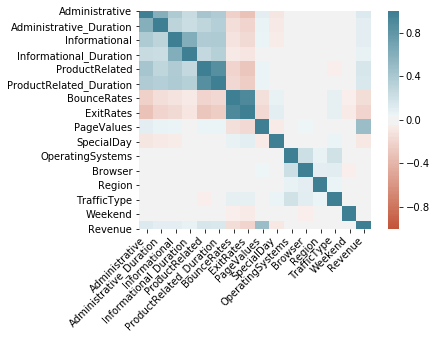

In [8]:
# Correlation matrix
print('Correlation matrix between the dataset features.')
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

The correlation matrix graph shows a strong positive correlation between the attributes "BounceRates" and "ExitRates". Let us remember that Bounce rate is the percentage of people who landed on a page and immediately left, so they are always one-page sessions. A high Bounce rate on a home page is usually a sign that something is wrong, but it’s really a matter of context. Instead Exit rate is the percentage of people who left your site from that page and exits may have viewed more than one page in a session. That means they may not have landed on that page, but simply found their way to it through site navigation. What is important is that like Bounce rates, high Exit rates can often reveal problem areas on your site and that's why we have a strong correlation between them. 

It's also clear that the attributes "Administrative", "Informational" and "ProductRelated" are quite positively correlated with their duration attributes, because the number of pages of a certain type visited during the session is related to the time spent on that type of pages. You can see a greater correlation in the case of product pages because, with the same number of pages of the 3 types, more time is spent on a product page where all its specifications and characteristics are looked at.

We can also observe a quite high positive correlation between the "PageValues" feature and the label "Revenue", and this is what we expected because the objective of the first value is to give an idea of the page that has contributed most to the site's revenue. If a page has not been involved in any way in the e-commerce transaction, its Page Value is € 0, since the page has never been visited in a session where a transaction was made.
-- **vedere se aggiungere altro** -- 

As seen previously with the previous of the first five lines of the loaded data, we can observe how the categorical attributes "Month", "VisitorType" and "Weekend" have string values but they can be easily transformed into numbers.
"Weekend" is transformed by placing *0* if it was *False* and *1* if it was *True*; similarly "VisitorType" is set to *1* if it was a returning visitor and *0* if it is a new one. 
Instead "Month" is transformed using LabelEncoder which automatically converts each distinct label into an unique integer.

In [9]:
# Label Encoding
data['Weekend'] = data['Weekend'].apply(lambda x: 0 if x=='False' else 1)
data['VisitorType'] = data['VisitorType'].apply(lambda x: 0 if x=='New_Visitor' else 1)
le = LabelEncoder()
le.fit(data['Month'])
data['Month'] = le.transform(data['Month'])

print('This is a preview of the first 5 lines of the loaded dataset with the transformed attributes.\n')
print(data.head(5))

This is a preview of the first 5 lines of the loaded dataset with the transformed attributes.

   Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  Revenue
0  0               0.0                      0              0.0                     1               0.000000                 0.20         0.20       0.0         0.0         2      1                 1        1       1            1            1        False  
1  0               0.0                      0              0.0                     2               64.000000                0.00         0.10       0.0         0.0         2      2                 2        1       2            1            1        False  
2  0               0.0                      0              0.0                     1               0.000000                 0.20      

In [0]:
print('\n\n')
print('The following statistical measures can give us a statistical overview of the data.\n')
print(data.describe())




The following statistical measures can give us a statistical overview of the data.

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay         Month  OperatingSystems       Browser        Region   TrafficType  VisitorType  Weekend
count  12330.000000    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000      12330.000000  12330.000000  12330.000000  12330.0      12330.0
mean   2.315166        80.818611                0.503569       34.472398               31.731468       1194.746220              0.022191      0.043073      5.889258      0.061427      4.821573      2.124006          2.357097      3.147364      4.069586      1.0          1.0    
std    3.321784        176.779107               1.270156       140.749294   

In order to better understand this data, let us move on to a more in-depth exploration.

In [0]:
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
revenue_dict = {False: "No Revenue", True: "Revenue"}
y = data["Revenue"].value_counts()

d = [go.Bar(x=[revenue_dict[x] for x in y.index], y=y.values, marker = dict(color = colors[:len(y.index)]))]
layout = go.Layout(
    title='Revenue distribution over the total',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='number of samples',
    ),
)
fig = go.Figure(data=d, layout=layout)
fig.show()
#iplot(fig, filename='basic-bar3')

revenue_percentage = data["Revenue"].sum() * 100 / data["Revenue"].shape[0]
print("The Revenue percentage is %.3f%%." % revenue_percentage)

The Revenue percentage is 15.474%.


In [0]:
month_revenue = data.groupby(["Month", "Revenue"]).size().unstack()
trace1 = go.Bar(
    x=month_revenue.index,
    y=month_revenue[0],
    marker = dict(color = colors[0]),
    name='No Revenue'
)
trace2 = go.Bar(
    x=month_revenue.index,
    y=month_revenue[1],
    marker = dict(color = colors[1]),
    name='Revenue'
)
d2 = [trace1, trace2]
layout = go.Layout(
    title='Revenue Distribution for Month',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='Month',
        tickangle=45
    ),
    yaxis=dict(
        title='Number of samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=d2, layout=layout)
fig.show()

#revenue_percentage = data["Revenue"].sum() * 100 / data["Revenue"].shape[0]
#print("The Revenue percentage is %.3f%%." % revenue_percentage)

In [0]:
weekend_revenue = data.groupby(["Weekend", "Revenue"]).size().unstack()
trace1 = go.Bar(
    x=weekend_revenue.index,
    y=weekend_revenue[0],
    marker = dict(color = colors[0]),
    name='No Revenue'
)
trace2 = go.Bar(
    x=weekend_revenue.index,
    y=weekend_revenue[1],
    marker = dict(color = colors[1]),
    name='Revenue'
)
d2 = [trace1, trace2]
layout = go.Layout(
    title='Revenue Distribution on Weekend',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='Weekend',
        tickangle=45
    ),
    yaxis=dict(
        title='Number of samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=d2, layout=layout)
fig.show()

In [0]:
data[['BounceRates', 'Revenue']].groupby(['BounceRates'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['ExitRates', 'Revenue']].groupby(['ExitRates'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['Administrative', 'Revenue']].groupby(['Administrative'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['Administrative_Duration', 'Revenue']].groupby(['Administrative_Duration'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['Informational_Duration', 'Revenue']].groupby(['Informational_Duration'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['ProductRelated_Duration', 'Revenue']].groupby(['ProductRelated_Duration'], as_index=False).mean().sort_values(by='Revenue', ascending=False)
data[['VisitorType', 'Revenue']].groupby(['VisitorType'], as_index=False).mean().sort_values(by='Revenue', ascending=False)


,VisitorType,Revenue
0,1,0.154745


In [0]:
data[['PageValues', 'Revenue']].groupby(['Revenue'], as_index=False).mean()

,Revenue,PageValues
0,False,1.975998
1,True,27.264518


Calculating the average of the attribute "PagesValues" for both sessions ended with purchase and sessions ended without purchase, we can see that the former is much higher than the latter. This confirms the quite good correlation that we noticed previously between the attributes "PagesValues" and "Revenue".


Now we can save the attribute "Revenue" as label and exlude it from the dataset.

In [0]:
# Save attribute label and delete it from the dataset
label = data['Revenue'][:]
X = np.array(data.drop(['Revenue'], 1))

In order to reduce the dimensionality of our dataset, we could apply the PCA (Principal Component Analysis), i.e. a technique for deriving a low-dimensional set of features from a large set of variables. Given data points in a large space, it projects them into a lower dimensional space while preserving as much information as possible and maximizing the variance of the projected data. The chosen projection is the one that minimizes mean squared distance between data point and projections. The new space's principal component corrensponds to the points in the direction of the largest variance; each sbusequent principal component is orthogonal to the previous ones and it corresponds to points in the directions of the largest variance of the residual subspace. 

Given a set of data points, if we compute the covariance matrix E, the PCA basis vectors are the eigenvectors of E, therefore the larger eigenvalue corresponds to the more important eigenvectors. 

As it is a required condition for PCA analysis, we firstly have to standardize data, by subtracting the mean and scaling to unit variance with the *StandardScaler* of the sklearn library.

Once have scaled data, we can perform the PCA and the amount of explained variance by each component and the cumulative explained variance in order to can choose in order to choose the most appropriate number of components for our analysis.

In [0]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(random_state=SEED)
data_pca = pca.fit_transform(data_scaled)

tot = sum(pca.explained_variance_) # total explained variance of all principal components
var_exp = [(i / tot) * 100 for i in sorted(pca.explained_variance_, reverse=True)] # individual explained variance
cum_var_exp = np.cumsum(var_exp) # cumulative explained variance

trace_cum_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)), 
    y=var_exp,
    marker = dict(color = colors[0]),
    name="individual explained variance",
)
trace_ind_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)),
    y=cum_var_exp,
    marker = dict(color = colors[7]),
    name="cumulative explained variance",
)
d = [trace_cum_var_exp, trace_ind_var_exp]
layout = go.Layout(
    title='Individual and Cumulative Explained Variance',
    autosize=True,
    yaxis=dict(
        title='percentage of explained variance',
    ),
    xaxis=dict(
        title="principal components",
        dtick=1,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=d, layout=layout)
fig.show()

Covering more than **% of the total variance explained, we can choose a PCA with * components. 

From now on, we will carry out two types of analysis, the first taking into account the dimensional reduction implemented by the PCA and the second where the classifiers will be used directly on the original data space.


 Percentage of variance explained by each of the selected components: [0.20532548 0.10940013]

 The singular values corresponding to each of the selected components: [207.45668108 151.43104466]

 Percentage of variance explained by each of the selected components: [1.]


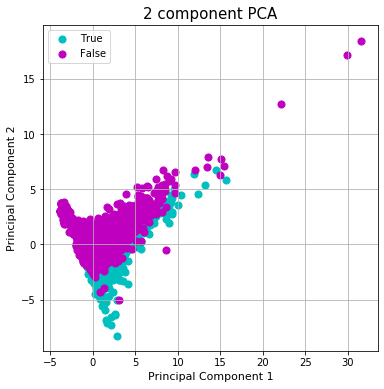

In [0]:
# PCA
# Define the Standard Scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(random_state=SEED)
data_pca = pca.fit_transform(data_scaled)

print('\n Percentage of variance explained by each of the selected components: {}'.format(pca.explained_variance_ratio_))
print('\n The singular values corresponding to each of the selected components: {}'.format(pca.singular_values_))
principal_X = pd.DataFrame(data = data_pca, columns = ['principal component 1', 'principal component 2'])
final_X = pd.concat([principal_X, label], axis = 1)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 11)
ax.set_ylabel('Principal Component 2', fontsize = 11)
ax.set_title('2 component PCA', fontsize = 15)
targets = [True, False]
colors = ['c','m']
for target, color in zip(targets,colors):
    indicesToKeep = final_X['Revenue'] == target
    ax.scatter(final_X.loc[indicesToKeep, 'principal component 1']
               , final_X.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#LDA
lda = LinearDiscriminantAnalysis(n_components=None)
data_lda = lda.fit(data_scaled, label).transform(data_scaled)
print('\n Percentage of variance explained by each of the selected components: {}'.format(lda.explained_variance_ratio_))

principal_X2 = pd.DataFrame(data = data_lda, columns = ['linear component 1'])
final_X2 = pd.concat([principal_X2, label], axis = 1)

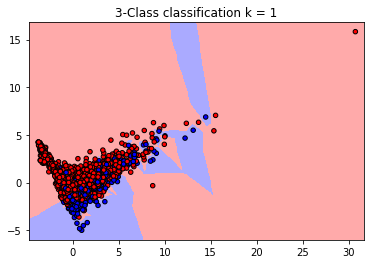

In [0]:
# KNN
# Apply the function train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, label, test_size=0.5, train_size=0.5, random_state = 0)

y = target_train

h = 0.1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 1
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

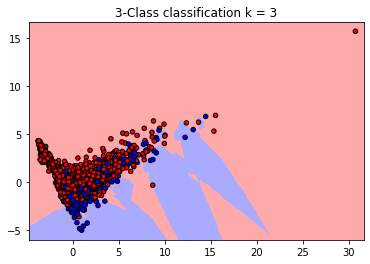

In [0]:
n_neighbors = 3
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

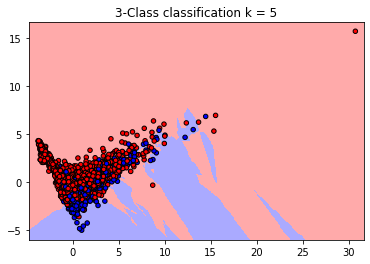

In [0]:
n_neighbors = 5
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

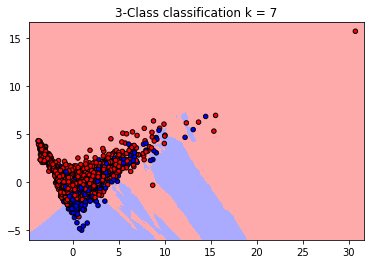

In [0]:
n_neighbors = 7
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

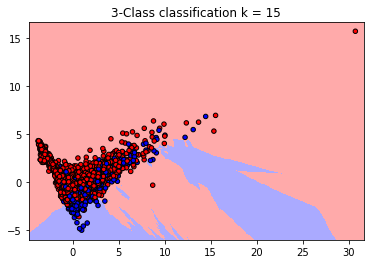

In [0]:
n_neighbors = 15
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

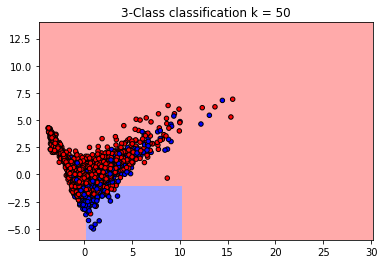

In [0]:
h = 5
n_neighbors = 50
# we create an instance of Neighbours Classifier and fit the data.
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"% (n_neighbors))

plt.show()

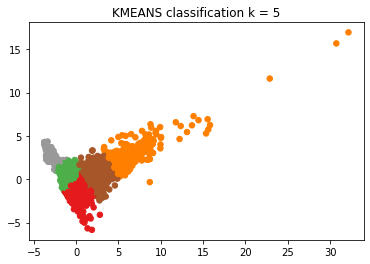

In [0]:
# KMEANS
cluster = 5
kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X)
labels = kmeans.labels_
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), s=30, cmap='Set1')
plt.title("KMEANS classification k = %i"% (cluster))

plt.show()

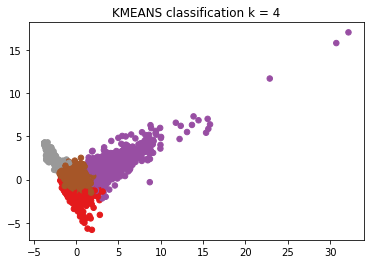

In [0]:
cluster = 4
kmeans = KMeans(n_clusters=cluster, random_state=0).fit(dataset)
labels = kmeans.labels_
# Plot also the training points
pca.fit(dataset)
X = pca.transform(dataset)
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), s=30, cmap='Set1')
plt.title("KMEANS classification k = %i"% (cluster))

plt.show()

In [0]:
cluster = 2
kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X)
labels = kmeans.labels_
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == label[i]:
        correct += 1

print(correct/len(X))

0.8154906731549068


In [0]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans.fit(X_scaled)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == label[i]:
        correct += 1

print(correct/len(X))

0.8350364963503649


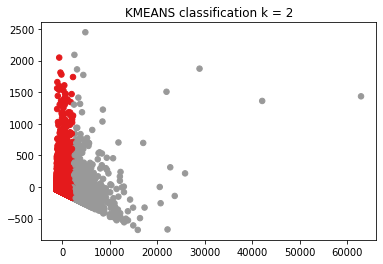

In [0]:
X1 = pca.fit(X).transform(X)
plt.scatter(X1[:, 0], X1[:, 1], c=labels.astype(np.float), s=30, cmap='Set1')
plt.title("KMEANS classification k = %i"% (cluster))

plt.show()

In [0]:
print(pca.explained_variance_ratio_)

[0.98773541 0.00754397]


In [0]:
#KNN
X_train, X_test, target_train, target_test = train_test_split(X_scaled, label, test_size=0.5, train_size=0.5, random_state = 0)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, target_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8561232765612328


In [0]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, target_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8588807785888077


In [0]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, target_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8588807785888077


In [0]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, target_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8580697485806975


In [0]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, target_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8601784266017842


In [0]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, target_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8611516626115167


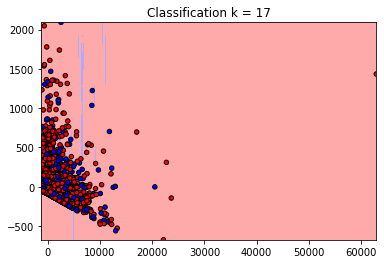

In [0]:
X1 = pca.fit(X).transform(X)
X_train, X_test, target_train, target_test = train_test_split(X1, label, test_size=0.5, train_size=0.5, random_state = 0)
y = target_train

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, target_train)

h = 5  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification k = 17")

plt.show()

In [0]:
# DECISION TREE
X_train, X_test, target_train, target_test = train_test_split(X, label, test_size=0.5, train_size=0.5, random_state = 0)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, target_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8869424168694242


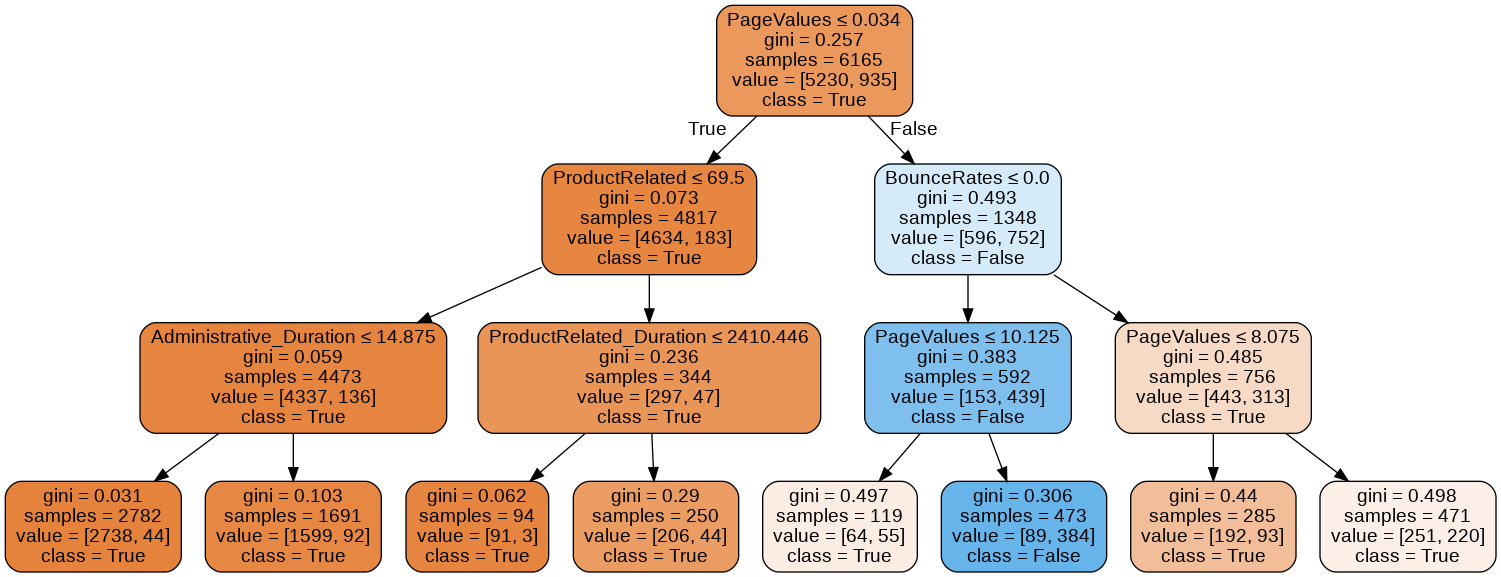

In [0]:
feature_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['True','False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('revenues_depth3.png')
Image(graph.create_png())

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, target_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8896999188969992


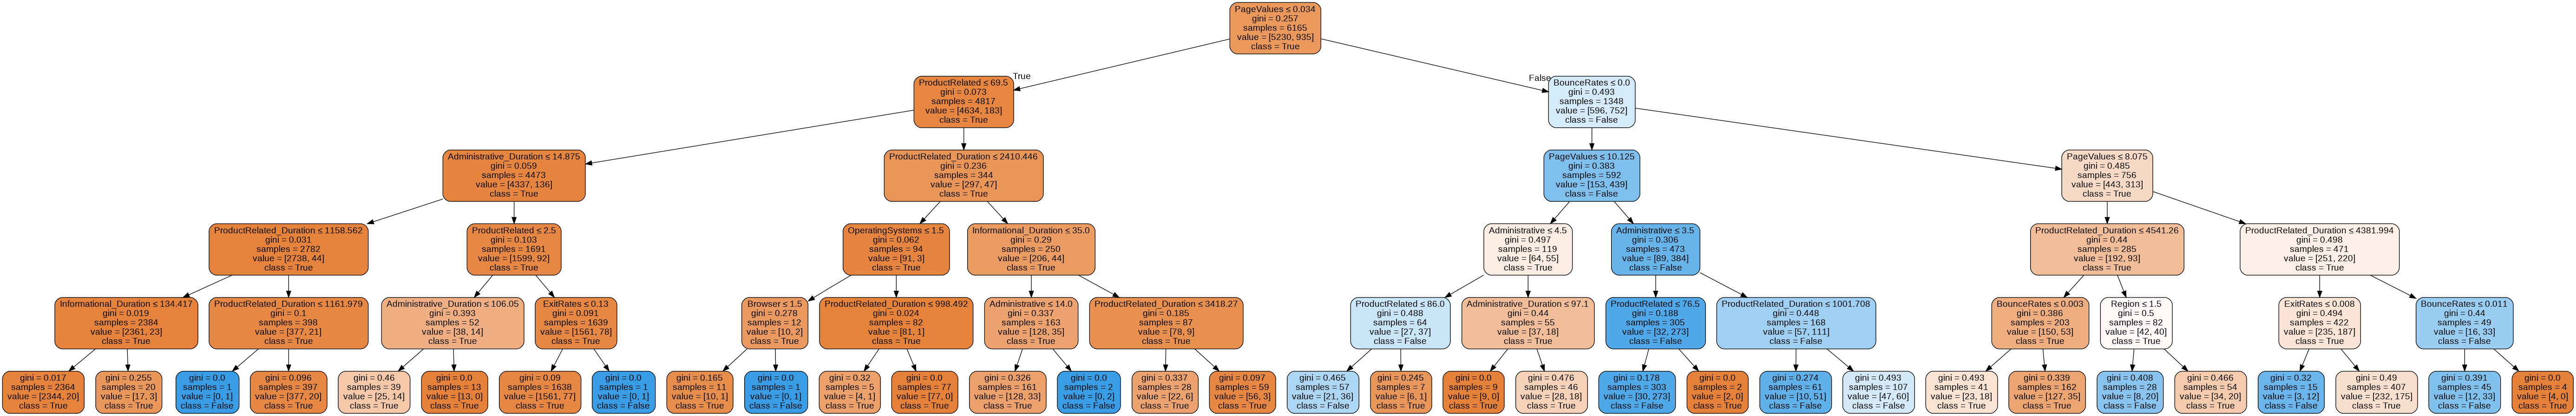

In [0]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['True','False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('revenues_depth5.png')
Image(graph.create_png())

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, target_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8472019464720195


In [0]:
X_train, X_test, target_train, target_test = train_test_split(X, label, test_size=0.5, train_size=0.5, random_state = 0)

clf_svm = svm.SVC(kernel = 'linear', gamma='auto')
clf_svm.fit(X_train, target_train)

y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

Accuracy: 0.8838605028386051


In [0]:
accuracy = np.zeros((7,2))
i = 0
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  j = 0
  for ker in ['linear', 'rbf']:
    # Create an instance of SVC Classifier with linear kernel and fit the data.
    clf_svm = svm.SVC(C = c, kernel = ker, gamma='auto')
    clf_svm.fit(X_train, target_train)

    y_pred = clf_svm.predict(X_test)
    accuracy[i,j] = metrics.accuracy_score(target_test, y_pred)
    j += 1
  i += 1
  
print(accuracy)
print(accuracy.max())

NameError: ignored

In [0]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

NameError: ignored

In [0]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')